**Purpose of the project:**

Identify patterns that test whether a game is successful or not, which will help us find the winning games and plan successful advertising campaigns.

In [1]:
import pandas as pd
#import sidetable as stb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import factorial
from nltk.stem import SnowballStemmer 
from scipy import stats as st
import math

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/datasets/games.csv')
data = pd.DataFrame(data)

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.columns= data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.isnull().sum()/len(data)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [6]:
data.isnull().sum()/len(data)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [7]:
data.dropna(subset =['name', 'year_of_release'], inplace=True)

In [8]:
data['rating'] = data['rating'].fillna('unknown')

In [9]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [10]:
data['user_score'] = data['user_score'].fillna(-1)

In [11]:
data['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [12]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [13]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

In [14]:
data['critic_score'] = data['critic_score']/ 10
data['critic_score']

0        7.6
1       -0.1
2        8.2
3        8.0
4       -0.1
        ... 
16710   -0.1
16711   -0.1
16712   -0.1
16713   -0.1
16714   -0.1
Name: critic_score, Length: 16444, dtype: float64

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-0.1,-1,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-0.1,-1,unknown,31.38


***Missing values:***

*Missing values were found and treated in various ways:*

1.We decided to make the abbreviation TBD a (-1), as it does not really have information available and at this point it does not contribute to the analysis.

2.In the columns 'name' and years of release the percentage of missing values was minor (0.01%, 1.6%), so we deleted them.

3.In the rating column, the missing values make up a significant percentage (40.4%) of the data, so they cannot be deleted and have been changed to an "unknown" value.

4.In the columns 'critic score' and 'user score' considerable percentage of missing values were found (51.3%, 47.5%) so they were not deleted and since these are numerical values I did not replace them with any value and left them missing.


Possible reasons for the missing values:

*The rating column is a system that calculates the appropriate user age for the game, perhaps it is games that it does not know how to rate or bug in its system.

*In the review columns it may be that the missing entries are just very unsuccessful or very old games that no one has given their opinion on.

***Steps taken up to this point:***

1.Loading the libraries and data.

2.Make the column names lowercase.

3.Checking for missing values:

-Expend the percentage of the missing values.

-Treatment of missing values.

4.Changing the column of the year the game was published to an integer.

5.Divide the critic_score column by 10 so that it is on the same scale as user_score in case I need to compare them.

6.Create a new column which includes the total revenue of the game from all areas.

***data analysis***

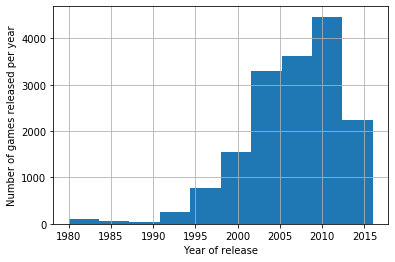

In [16]:
data['year_of_release'].hist();
plt.ylabel('Number of games released per year');
plt.xlabel('Year of release');

The table shows the distribution of games exits by year. It can be seen that the data begin to be significant in the early 2000s.

In [17]:
def years_group(cell):
    if cell < 1990:
        return '80'
    if cell< 2000:
        return '90s'
    if cell< 2010:
        return '00s'
    else:
        return '10s'

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice function)
</div>

In [18]:
data['year_group']=data['year_of_release'].apply(years_group)
data['year_group'].value_counts()

00s    9193
10s    5277
90s    1769
80      205
Name: year_group, dtype: int64

The period of time I decided to divide the data according to which is decades.
We can see that there is growth in the number of games over the decades when in the 00s the growth reaches a peak (and a considerable gap from the other decades) and a significant decline begins (56.8%) when entering the 10's decade.

,total_sales
count,31.000000
mean,284.334516
std,343.954144
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


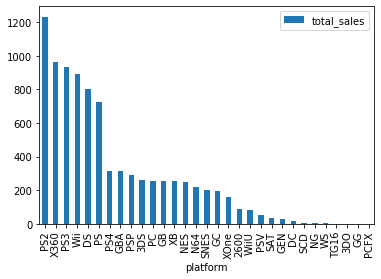

In [19]:
pdata = pd.pivot_table(data, values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False)
pdata.plot(kind='bar')
pdata.describe()

This table shows the distribution of total sales by platform.

count    2127.000000
mean     2004.583921
std         2.567689
min      2000.000000
25%      2002.000000
50%      2005.000000
75%      2007.000000
max      2011.000000
Name: year_of_release, dtype: float64

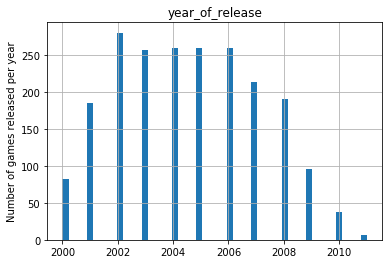

In [20]:
ps2 = data.query('platform== "PS2"')
ps2.hist('year_of_release', bins=50)
plt.ylabel('Number of games released per year');
ps2['year_of_release'].describe()

count    1232.000000
mean     2009.880682
std         2.458339
min      2005.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

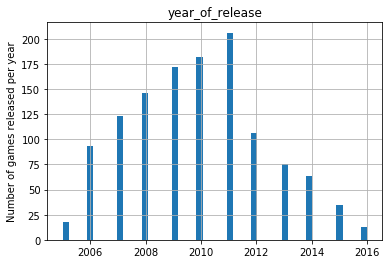

In [21]:
x360= data.query('platform== "X360"')
x360.hist('year_of_release', bins=50)
plt.ylabel('Number of games released per year');
x360['year_of_release'].describe()

count    1306.000000
mean     2010.840735
std         2.459616
min      2006.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2016.000000
Name: year_of_release, dtype: float64

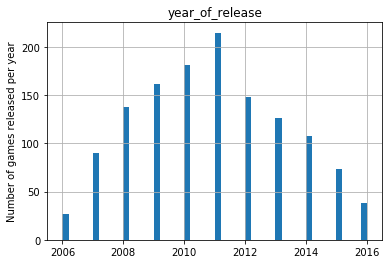

In [22]:
ps3 = data.query('platform== "PS3"').sort_values(by='year_of_release', ascending=False)
ps3.hist('year_of_release', bins=50)
plt.ylabel('Number of games released per year');
ps3['year_of_release'].describe()

The above three tables show the distributions of the three most profitable platforms.

I took the PS2 platform.
The platform is analyzed above and it can be seen that the "lifespan" of a platform is about 11 years. You can see that it has been on the rise from the moment it hit the market until 2006, and from there the trend changed and started to go down until it disappeared in 2011. If you compare its data to the PS3 platform (its more advanced model), you can see that when the PS3 hit the market, the PS2 changed Which overall makes a lot of sense).
Conclusion - The lifespan of the platform ranges around 11 years. Rises in about 6 years, and when a new model arrives it starts to drop.

In light of the above data, the time period I will work with will be 11 years and since we are preparing for 2017, only data from 2006 will be relevant at the moment.

In [23]:
reldata = data.query('year_of_release>= 2006')
reldata = pd.DataFrame(data=reldata)

,total_sales
platform,
X360,952.99
PS3,931.34
Wii,891.18
DS,655.35
PS4,314.14
PS2,265.80
3DS,257.81
PSP,238.63
PC,163.42


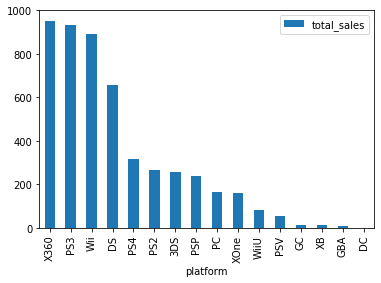

In [24]:
pv2 = pd.pivot_table(reldata, values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False)
pv2.plot(kind='bar')
pv2

The PS3 and X360 platforms are still the top, but the PS2 has dropped significantly.
We will continue to work with the same platforms, only we will replace the PS2 with wii.

In [25]:
grouped = reldata.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
10327,XOne,XCOM 2,0.04
10328,XOne,ZombiU,0.01
10329,XOne,Zombie Army Trilogy,0.11
10330,XOne,Zoo Tycoon (2013),0.36


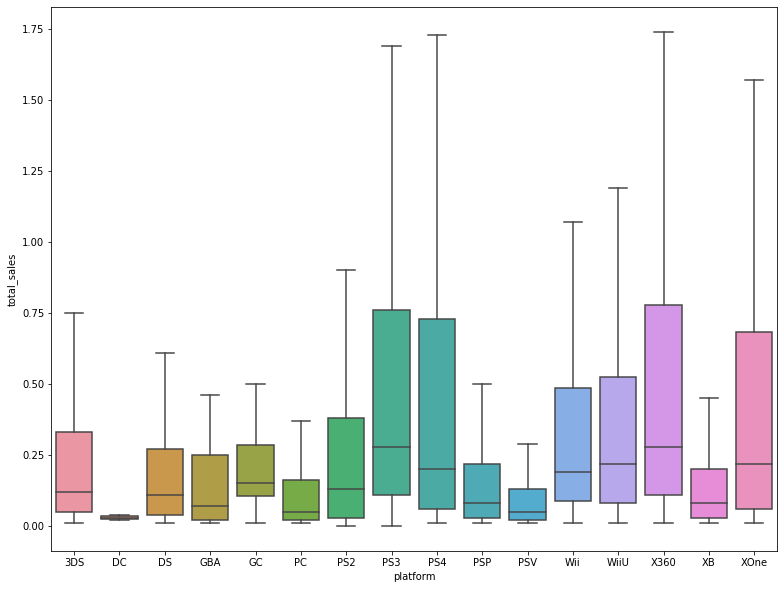

In [26]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=grouped, showfliers=False)

In [27]:
pv3 = pd.pivot_table(reldata, values='total_sales', index='platform', aggfunc='mean').sort_values(by='total_sales', ascending=False)
print('Mean of total sales by platform:')
pv3

Mean of total sales by platform:


,total_sales
platform,
PS4,0.801378
X360,0.785000
PS3,0.713124
Wii,0.692986
XOne,0.645020
WiiU,0.559116
3DS,0.503535
DS,0.331152
PS2,0.330186


In the above Plot Box we can see the distribution of sales for our relevant products that are divided by platform. It can be clearly seen that the top four platforms are X360, XONE, PS3 and PS4.
In addition we can see very large exceptions in these platforms, which indicates that some games are sold in a much more massive way than the others.
As for the wii platform, its average sales are higher than the PS4, but it can be seen that it does not have as much sought-after games as the PS4 (because it does not have such extreme exceptions).
As for the average sales, it is quite equal between the platforms.

conclusion:

The platforms I mentioned above have games that sell more radically than the rest of the platform games.

In [78]:
def score_effect(platform, score_type):
    df= data[(data.platform==platform)&(data[score_type].notna())][['total_sales', score_type]]        
    plot = data.plot(x=platform, y=score_type, kind='scatter') 
    corre = data[platform].corr(data[score_type])
    if corre > 0.7:
        result = 'positive correlation'
    else:
        result = 'negative correlation'
    print (result)     

In [68]:
na = reldata.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,platform,na_sales
13,X360,588.84
11,Wii,486.87
7,PS3,390.13
2,DS,323.99
6,PS2,114.89


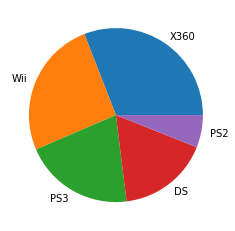

In [69]:
na['na_sales']=pd.to_numeric(na['na_sales'])
mylabels3 = ["X360", "Wii", "PS3", "DS", "PS2"]
plt.pie(na['na_sales'], labels = mylabels3)
plt.show()

In [70]:
eu = reldata.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,platform,eu_sales
7,PS3,327.21
13,X360,267.89
11,Wii,258.32
2,DS,142.99
8,PS4,141.09


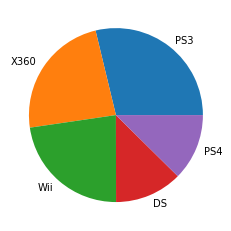

In [72]:
eu['eu_sales']=pd.to_numeric(eu['eu_sales'])
mylabels4 = ["PS3", "X360", "Wii", "DS", "PS4"]
plt.pie(eu['eu_sales'], labels = mylabels4)
plt.show()

In [31]:
jp = reldata.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,platform,jp_sales
2,DS,141.49
0,3DS,100.62
7,PS3,79.41
9,PSP,70.63
11,Wii,68.28


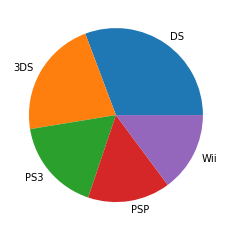

In [73]:
jp['jp_sales']=pd.to_numeric(jp['jp_sales'])
mylabels5 = ["DS", "3DS", "PS3", "PSP", "Wii"]
plt.pie(jp['jp_sales'], labels = mylabels5)
plt.show()

In the tables above you can see the most requested platforms by region.
It seems that in Europe and North America the competition between Sony and Xbox is close while in Europe one tends towards Sony and in North America towards Xbox.
In Japan the DS is ranked first while the Sony third, and it seems that the Xbox is not so popular.

In [74]:
nag = reldata.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
nag

,genre,na_sales
0,Action,530.44
10,Sports,396.64
8,Shooter,373.13
3,Misc,285.06
7,Role-Playing,199.63


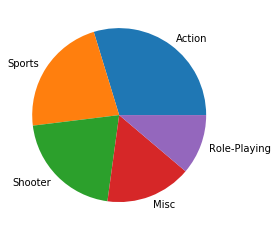

In [75]:
nag['na_sales']=pd.to_numeric(nag['na_sales'])
mylabels6 = ["Action", "Sports", "Shooter", "Misc", "Role-Playing"]
plt.pie(nag['na_sales'], labels = mylabels6)
plt.show()

In [35]:
eug = reldata.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eug

,genre,eu_sales
0,Action,350.70
10,Sports,251.55
8,Shooter,238.89
3,Misc,146.88
6,Racing,113.39


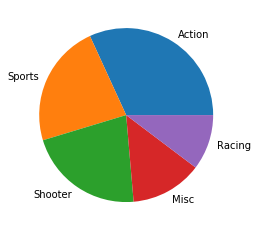

In [76]:
eug['eu_sales']=pd.to_numeric(eug['eu_sales'])
mylabels7 = ["Action", "Sports", "Shooter", "Misc", "Racing"]
plt.pie(eug['eu_sales'], labels = mylabels7)
plt.show()

In [36]:
jpg = reldata.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jpg

,genre,jp_sales
7,Role-Playing,170.38
0,Action,102.07
3,Misc,64.53
10,Sports,48.97
4,Platform,35.20


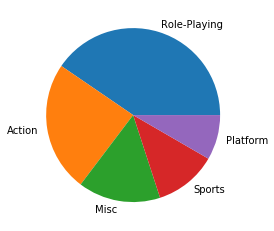

In [77]:
jpg['jp_sales']=pd.to_numeric(jpg['jp_sales'])
mylabels8 = ["Role-Playing", "Action", "Misc", "Sports", "Platform"]
plt.pie(jpg['jp_sales'], labels = mylabels8)
plt.show()

In the tables above you can see the most popular genres divided by region.
North America and Europe seem to be very similar in taste, with both preferring action and sports.
In Japan the action is also popular but the most popular genre is role-playing games.

In [64]:
nar = reldata.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
nar

,rating,na_sales
0,E,796.98
3,M,574.33
5,T,424.14
1,E10+,315.40
6,unknown,274.50


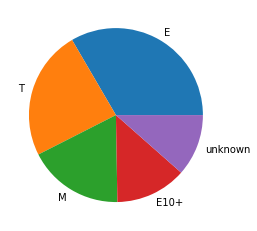

In [65]:
nar['na_sales']=pd.to_numeric(nar['na_sales'])
mylabels1 = ["E", "T", "M", "E10+", "unknown"]
plt.pie(nar['na_sales'], labels = mylabels1)
plt.show()

In [66]:
eur = reldata.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eur

,rating,eu_sales
0,E,461.09
3,M,398.90
5,T,235.44
6,unknown,227.19
1,E10+,173.35


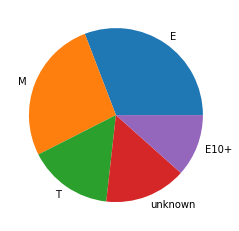

In [67]:
eur['eu_sales']=pd.to_numeric(eur['eu_sales'])
mylabels2 = ["E", "M", "T", "unknown", "E10+"]
plt.pie(eur['eu_sales'], labels = mylabels2)
plt.show()

In [60]:
jpr = reldata.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jpr

,rating,jp_sales
6,unknown,276.69
0,E,120.36
5,T,83.90
3,M,43.79
1,E10+,36.57


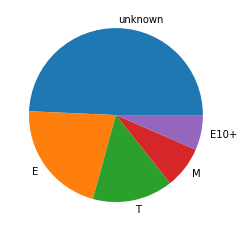

In [61]:
jpr['jp_sales']=pd.to_numeric(jpr['jp_sales'])
mylabels = ["unknown", "E", "T", "M", "E10+"]
plt.pie(jpr['jp_sales'], labels = mylabels)
plt.show()

The above tables show the amount of sales according to the ESRB rating which is divided by regions.
The results really seem to be the same, so there is an effect of the ranking on sales (in Japan there are a lot of unknown values ​​but it is a result of missing values ​​that we converted in previous steps).

***Hypothesis testing***

In [42]:
xbox_1 = data.query('platform =="XOne" and user_score != "tbd" and user_score != -1')

In [43]:
pc = data.query('platform =="PC" and user_score != "tbd" and user_score != -1')

In [44]:
xbox_1['user_score'] = pd.to_numeric(xbox_1['user_score'])
pc['user_score'] = pd.to_numeric(pc['user_score'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


H0 = Average user ratings of the Xbox One and PC platforms are the same.

H1 = Average user ratings of the Xbox One and PC platforms are diffrent.

In [45]:
alfa = 0.05


result2 = st.ttest_ind( 
        xbox_1['user_score'], pc['user_score'], equal_var = False)
print('p-value', result2.pvalue)

if (result2.pvalue < alfa):
    print('we reject the null hypothesis')
else:
    print('we can not reject the null hypothesis')    
    
xbox_1_m =xbox_1.mean()
pc_m = pc.mean()

p-value 4.5385802963771776e-06
we reject the null hypothesis


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [47]:
action = data.query('genre =="Action" and user_score != "tbd" and user_score != -1')
sport = data.query('genre =="Sports" and user_score != "tbd" and user_score != -1')
action['user_score'] = pd.to_numeric(action['user_score'])
sport['user_score'] = pd.to_numeric(sport['user_score'])
sport

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54,00s
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77,00s
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,8.0,7.7,E,22.70,00s
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,8.0,7.4,E,21.80,00s
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,-0.1,4.5,E,0.01,10s
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,-0.1,1.4,E,0.01,10s
16528,Pro Evolution Soccer 2010,PC,2009,Sports,0.00,0.01,0.00,0.00,7.8,6.9,E,0.01,00s
16546,Wade Hixton's Counter Punch,GBA,2004,Sports,0.01,0.00,0.00,0.00,7.8,9.5,T,0.01,00s


H0 = Average user ratings for the Action and Sports genres are the same.

H1 = Average user ratings for the Action and Sports genres are different.

In [48]:
alfa = 0.05

result3 = st.ttest_ind(action['user_score'], sport['user_score'], equal_var=False)

print('p-value', result3.pvalue)

if (result3.pvalue < alfa):
    print('we reject the null hypothesis')
else:
    print('we can not reject the null hypothesis')    
    
action_m =action.mean()
sport_m = sport.mean()

p-value 0.07370217419278534
we can not reject the null hypothesis


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


***Hypotheses tested:***

1.Average user ratings of the Xbox One and PC platforms are the same - rejected.

2.Average user ratings for the Action and Sports genres are the same - we can not reject the hypothesis.

***General conclusion:***

We will start with the conclusion for which we have come together, what are the most profitable patterns of games according to the last time period we have defined (11 years):

1.X360, XONE, PS3 and PS4 are the most profitable platforms so it is advisable to focus on them (if we are operating in North America and Europe).

2.If we are operating in Japan, it is better to focus on the DS platform.

3.The ESRB ranking does affect sales and the more appropriate it is for a wider age range, the greater the sales.

4.In North America and Europe the preferred playing styles are action and sports while in Japan it is role-playing.

***Steps taken:***

***Data preparation:***

1.Loading the libraries and data.

2.Make the column names lowercase.

3.Checking for missing values:

-Expend the percentage of the missing values.

-Treatment of missing values.

4.Changing the column of the year the game was published to an integer.

5.Divide the critic_score column by 10 so that it is on the same scale as user_score in case I need to compare them.

6.Create a new column which includes the total revenue of the game from all areas.

***Data Analysis:***

1.Creating a scatter histogram of the games by year of publication.

2.Divide the data by decades.

3.Create a table of sales according to platform.

4.Create sales charts by years for the top three platforms.

5.Cutting the data according to a relevant time period.

6.Test by regions in the world of:

-Sales by platform.

-Sales by genre.

-Sales according to ESRB rating.

***Hypothesis testing:***

1.Average user ratings of the Xbox One and PC platforms are the same - rejected.

2.Average user ratings for the Action and Sports genres are the same - we can not reject the hypothesis.